#1.Pandas

In [175]:
# importing libraries all needed
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score

In [176]:
#1.Read the provided CSV file ‘data.csv’
from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [177]:
#2.below is the basic statistical description about the data.
data_set = pd.read_csv('/drive/MyDrive/data.csv')
data_set.describe()

,Duration,Pulse,Maxpulse,Calories
count,169.000000,169.000000,169.000000,164.000000
mean,63.846154,107.461538,134.047337,375.790244
std,42.299949,14.510259,16.450434,266.379919
min,15.000000,80.000000,100.000000,50.300000
25%,45.000000,100.000000,124.000000,250.925000
50%,60.000000,105.000000,131.000000,318.600000
75%,60.000000,111.000000,141.000000,387.600000
max,300.000000,159.000000,184.000000,1860.400000


In [178]:
#3.checking if data has any null values
data_set.isnull().any()

Duration    False
Pulse       False
Maxpulse    False
Calories     True
dtype: bool

In [179]:
#dealing with null values by replacing twith their mean values
data_set.fillna(data_set.mean(), inplace=True) # used inplace to make the changes persistant in dataset after the execution.
data_set.isnull().any() # checking if we have any null values in the dataset.

Duration    False
Pulse       False
Maxpulse    False
Calories    False
dtype: bool

In [180]:
#4.Select at least two columns and aggregate the data using: min, max, count, mean.
data_set.agg({'Pulse':['min','max','count','mean'],'Calories':['min','max','count','mean']}) 
# used the agg function to aggregate the data for 2 columns Pulse and Calories

,Pulse,Calories
min,80.000000,50.300000
max,159.000000,1860.400000
count,169.000000,169.000000
mean,107.461538,375.790244


In [181]:
#5.Filter the dataframe to select the rows with calories values between 500 and 1000.
data_set.loc[(data_set['Calories']>500)&(data_set['Calories']<1000)] 
# used the loc function to group the dataset as per the given condition for Calories column/label

,Duration,Pulse,Maxpulse,Calories
51,80,123,146,643.1
62,160,109,135,853.0
65,180,90,130,800.4
66,150,105,135,873.4
67,150,107,130,816.0
72,90,100,127,700.0
73,150,97,127,953.2
75,90,98,125,563.2
78,120,100,130,500.4
90,180,101,127,600.1


In [182]:
#6.Filter the dataframe to select the rows with calories values > 500 and pulse < 100.
data_set.loc[(data_set['Calories']>500)&(data_set['Pulse']<100)] 
# used the loc function to group the dataset as per the given condition for Calories and Pulse Labels.

,Duration,Pulse,Maxpulse,Calories
65,180,90,130,800.4
70,150,97,129,1115.0
73,150,97,127,953.2
75,90,98,125,563.2
99,90,93,124,604.1
103,90,90,100,500.4
106,180,90,120,800.3
108,90,90,120,500.3


In [183]:
#7.Create a new “df_modified” dataframe that contains all the columns from df except for “Maxpulse”
df_modified = data_set[['Duration','Pulse','Calories']] 
# excluded the Maxpulse column from the dataset
df_modified.head() #printing the top overview of data set in df_modified

,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,340.0
3,45,109,282.4
4,45,117,406.0


In [184]:
#8.Delete the “Maxpulse” column from the main df dataframe
del data_set['Maxpulse']    #deleted the label/column Maxpulse from the dataset using del function
display (data_set)

,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,340.0
3,45,109,282.4
4,45,117,406.0
...,...,...,...
164,60,105,290.8
165,60,110,300.0
166,60,115,310.2
167,75,120,320.4


In [185]:
#9.Convert the datatype of Calories column to int datatype.
print('Data Types before conversion are',data_set.dtypes) #display before the conversion of data type in dataset
data_set['Calories'] = data_set['Calories'].astype(int)  # applied conversion of data type for the data in label Calories
print('Data Types after conversion are',data_set.dtypes)  #display after conversion using .dtype

Data Types before conversion are Duration      int64
Pulse         int64
Calories    float64
dtype: object
Data Types after conversion are Duration    int64
Pulse       int64
Calories    int64
dtype: object


/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='Duration', ylabel='Calories'>

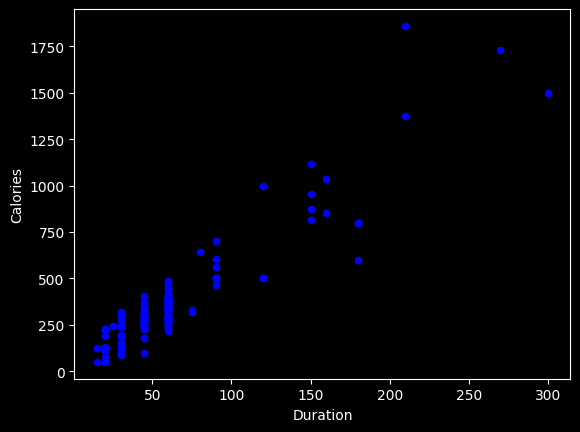

In [186]:
#10.Using pandas create a scatter plot for the two columns (Duration and Calories)
data_set.plot.scatter(x='Duration',y='Calories',c='blue') 
# displaying the pictorial plot for two columns(Duration and calories)

#Titanic Dataset
***

In [187]:

#2.1. Find the correlation between ‘survived’ (target column) and ‘sex’ column for the Titanic use case inclass.
#a. Do you think we should keep this feature?
train_titanic_raw = pd.read_csv('/drive/MyDrive/train.csv')
test_titanic_raw = pd.read_csv('/drive/MyDrive/test.csv')
combine = [train_titanic_raw,test_titanic_raw]

# Here we are Finding the correlation between ‘survived’ (target column) and ‘sex’ column for the Titanic use case as given

le = preprocessing.LabelEncoder()
train_titanic_raw['Sex'] = le.fit_transform(train_titanic_raw.Sex.values)
train_titanic_raw['Survived'].corr(train_titanic_raw['Sex'])



-0.5433513806577555

# **a. Do you think we should keep this feature?**
#when we see in the output of correlation matrix for train dataset, 
#-0.54 is much better value compared to all other correlations with other columns,as Survived is our target column and it is more correlated with Sex, 
#It is neccessary to keep this feature for our furthur analysis.

In [188]:
#Display Correlations Matrix --> it displays all correlations between all columns
matrix = train_titanic_raw.corr()  #corelations
display(matrix)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500
Sex,0.042939,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333
Age,0.036847,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000


In [189]:
#2.2 Do at least two visualizations to describe or show correlations.
#Visualization 1 is below
train_titanic_raw.corr().style.background_gradient(cmap="Reds")

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500
Sex,0.042939,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333
Age,0.036847,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000


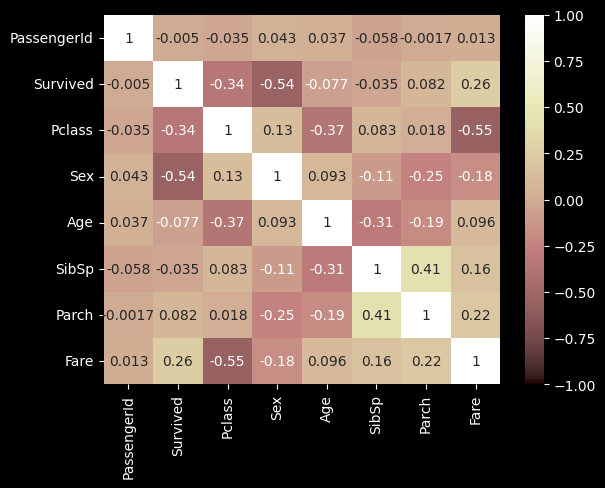

In [190]:
#Visualization 2 is below
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='pink')
plt.show()

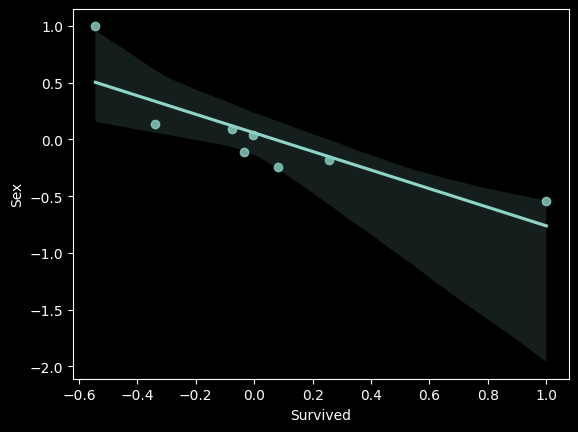

In [191]:
#Visualization 3 is below
plt.style.use('dark_background')
sns.regplot(data = matrix,x= 'Survived', y= 'Sex')
plt.show()

In [192]:
#2.3 Implement Naïve Bayes method using scikit-learn library and report the accuracy.
train_titanic_raw = pd.read_csv('/drive/MyDrive/train.csv')
test_titanic_raw = pd.read_csv('/drive/MyDrive/test.csv')


# Join data to analyse and process the set as one.
train_titanic_raw['train'] = 1
test_titanic_raw['train'] = 0
df = train_titanic_raw.append(test_titanic_raw, sort=False)

features = ['Age', 'Embarked', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp']
target = 'Survived'

df = df[features + [target] + ['train']]
# Categorical values need to be transformed into numeric.
df['Sex'] = df['Sex'].replace(["female", "male"], [0, 1])
df['Embarked'] = df['Embarked'].replace(['S', 'C', 'Q'], [1, 2, 3])
train_titanic = df.query('train == 1')
test_titanic = df.query('train == 0')


<ipython-input-192-aab99e524627>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = train_titanic_raw.append(test_titanic_raw, sort=False)


In [193]:
# Checking any Null values present in the dataset
print(train_titanic.isnull().sum())

Age         177
Embarked      2
Fare          0
Parch         0
Pclass        0
Sex           0
SibSp         0
Survived      0
train         0
dtype: int64


In [194]:
train_titanic['Embarked'].describe()

count    889.000000
mean       1.362205
std        0.636157
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: Embarked, dtype: float64

In [195]:
train_titanic.info

<bound method DataFrame.info of       Age  Embarked     Fare  Parch  Pclass  Sex  SibSp  Survived  train
0    22.0       1.0   7.2500      0       3    1      1       0.0      1
1    38.0       2.0  71.2833      0       1    0      1       1.0      1
2    26.0       1.0   7.9250      0       3    0      0       1.0      1
3    35.0       1.0  53.1000      0       1    0      1       1.0      1
4    35.0       1.0   8.0500      0       3    1      0       0.0      1
..    ...       ...      ...    ...     ...  ...    ...       ...    ...
886  27.0       1.0  13.0000      0       2    1      0       0.0      1
887  19.0       1.0  30.0000      0       1    0      0       1.0      1
888   NaN       1.0  23.4500      2       3    0      1       0.0      1
889  26.0       2.0  30.0000      0       1    1      0       1.0      1
890  32.0       3.0   7.7500      0       3    1      0       0.0      1

[891 rows x 9 columns]>

In [196]:
#Replacing missing values in Embarked Column
common_value = 3.000000
data = [train_titanic, test_titanic]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)
print(train_titanic.isnull().sum())

Age         177
Embarked      0
Fare          0
Parch         0
Pclass        0
Sex           0
SibSp         0
Survived      0
train         0
dtype: int64


<ipython-input-196-90c06fffa152>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Embarked'] = dataset['Embarked'].fillna(common_value)


In [197]:
meanAge = int(train_titanic.Age.dropna().mean())
print('Mean Age = ', meanAge)

#Replacing missing values in Age column with mean and in Fare column with median
for dataset in data:
    dataset['Age'] = dataset['Age'].fillna(meanAge)
    dataset['Fare'] = dataset['Fare'].fillna(test_titanic['Fare'].dropna().median())
print(train_titanic.isnull().sum())

Mean Age =  29
Age         0
Embarked    0
Fare        0
Parch       0
Pclass      0
Sex         0
SibSp       0
Survived    0
train       0
dtype: int64


<ipython-input-197-6a8736ab17b9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Age'] = dataset['Age'].fillna(meanAge)
<ipython-input-197-6a8736ab17b9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Fare'] = dataset['Fare'].fillna(test_titanic['Fare'].dropna().median())
<ipython-input-197-6a8736ab17b9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

In [198]:
X=train_titanic.drop(['Survived'],axis=1)
y=train_titanic['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


classifier = GaussianNB() 
classifier.fit(X_train, y_train)  
y_pred = classifier.predict(X_test)  
classifier.score(X_train, y_train)



0.7949101796407185

In [199]:
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy score
from sklearn.metrics import accuracy_score
display('accuracy is',accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.81      0.82       139
         1.0       0.70      0.74      0.72        84

    accuracy                           0.78       223
   macro avg       0.77      0.77      0.77       223
weighted avg       0.78      0.78      0.78       223

[[112  27]
 [ 22  62]]


'accuracy is'

0.7802690582959642

#QUESTION 2(Glass Dataset)
***

In [200]:
#1. Implement Naïve Bayes method using scikit-learn library.
#a. Use the glass dataset available # also provided in your assignment.
#b. Use train_test_split to create training and testing part.

# 2.1.a Reading file from glass csv data file from current directory
glass=pd.read_csv("/drive/MyDrive/glass.csv")


In [201]:
#2.1.b

features = ['Rl', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
target = 'Type'


X_train, X_val, Y_train, Y_val = train_test_split(glass[::-1], glass['Type'],test_size=0.2, random_state=1)

classifier = GaussianNB()

classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_val)
# Summarizing of the predictions made by the classifier
print(classification_report(Y_val, y_pred))
print(confusion_matrix(Y_val, y_pred))



              precision    recall  f1-score   support

           1       0.90      0.95      0.92        19
           2       0.92      0.92      0.92        12
           3       1.00      0.50      0.67         6
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         1
           7       0.75      0.75      0.75         4

    accuracy                           0.84        43
   macro avg       0.76      0.69      0.71        43
weighted avg       0.89      0.84      0.85        43

[[18  1  0  0  0  0]
 [ 1 11  0  0  0  0]
 [ 1  0  3  2  0  0]
 [ 0  0  0  0  0  1]
 [ 0  0  0  0  1  0]
 [ 0  0  0  1  0  3]]


In [202]:
#2.1.1
# Accuracy score
print('accuracy using Naive bayes method is',accuracy_score(Y_val, y_pred))

accuracy using Naive bayes method is 0.8372093023255814


In [203]:
#2nd part 2nd question --> Implement linear SVM method using scikit library
#Evaluate the model on testing part using score and classification_report
classifier = LinearSVC()
classifier.fit(X_train, Y_train)


y_pred = classifier.predict(X_val)

# Summary of the predictions made by the classifier
print(classification_report(Y_val, y_pred))
print(confusion_matrix(Y_val, y_pred))


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       1.00      0.95      0.97        19
           2       0.79      0.92      0.85        12
           3       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.40      1.00      0.57         4

    accuracy                           0.77        43
   macro avg       0.36      0.48      0.40        43
weighted avg       0.70      0.77      0.72        43

[[18  1  0  0  0  0]
 [ 0 11  0  0  1  0]
 [ 0  2  0  0  0  4]
 [ 0  0  0  0  0  1]
 [ 0  0  0  0  0  1]
 [ 0  0  0  0  0  4]]


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [204]:
# Accuracy score
print('accuracy using linear SVM is',accuracy_score(Y_val, y_pred))

accuracy using linear SVM is 0.7674418604651163


In [205]:
#last ans in 2nd question --> Do at least two visualizations to describe or show correlations in the Glass Dataset.
#visualization1
glass.corr().style.background_gradient(cmap="Reds")

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


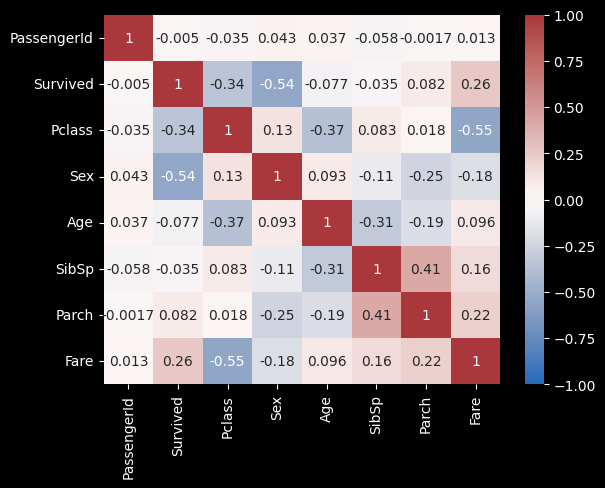

In [206]:
#visualization 2
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()

In [207]:
matrix = glass.corr()  #corelations of glass data
display(matrix)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


In [208]:
#Which algorithm you got better accuracy? Can you justify why?


***Which algorithm you got better accuracy? Can you justify why***
***

Naive bayes accuracy is greater than the accuracy that we got from linearSVM.This may be due to the following reasons:

1)We know that Naive Bayes assumes all the features are conditionally independent for the given dataset, this can be conditionally best with few datasets. Whereas,LinearSVM does not make any assumptions about the independence or correlation between the features, and it tries to find the optimal hyperplane that separates the data points. If the features are actually conditionally independent given the class, Naive Bayes can achieve better accuracy by exploiting this structure in the data.

2) Naive Bayes can handle categorical and continuous data, as well as missing values, more easily than LinearSVM.  The glass dataset contains a mix of categorical and continuous features, naive Bayes will be able to handle these cases more effectively than LinearSVM.